In [1]:
import wget
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_confirmed = "data/confirmed.csv"
file_deaths = "data/death.csv"
file_recovered = "data/recovered.csv"

url_confirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
url_deaths = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
url_recovered = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

In [3]:
def get_data():
    wget.download(url_confirmed, file_confirmed)
    wget.download(url_deaths, file_deaths)
    wget.download(url_recovered, file_recovered)

In [4]:
def clean_data():
    if (os.path.exists(file_confirmed)):
        os.remove(file_confirmed)
    if (os.path.exists(file_deaths)):
        os.remove(file_deaths)
    if (os.path.exists(file_recovered)):
        os.remove(file_recovered)

In [5]:
clean_data()
get_data()

In [6]:
confirmed_df = pd.read_csv(file_confirmed)
confirmed_df = confirmed_df.set_index('Country/Region')

deaths_df = pd.read_csv(file_deaths)
deaths_df = deaths_df.set_index('Country/Region')

recovered_df = pd.read_csv(file_recovered)
recovered_df = recovered_df.set_index('Country/Region')

In [7]:
woldwild_confirmed_df = confirmed_df.groupby(level='Country/Region').sum()
woldwild_deaths_df = deaths_df.groupby(level='Country/Region').sum()
woldwild_recovered_df = recovered_df.groupby(level='Country/Region').sum()

In [8]:
woldwild_confirmed_df.index.values, len(woldwild_confirmed_df.index.values)

(array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
        'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
        'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
        'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
        'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
        'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
        'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
        'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
        'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
        "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
        'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
        'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
        'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
        'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
        'Grenada', 'Gu

In [9]:
def compute_pct(data):
    pcts = ['-']*len(data)
    for i in range(len(data)-1):
        if data[i]!=0:
            pcts[i+1] = str(int((data[i+1]-data[i])/data[i]*100))+ " %"
    return pcts

In [38]:
def plot_df(data, pcts, dates, title="Confirmed", display="None"):
    x = np.arange(len(dates))  # the label locations
    width = 0.70  # the width of the bars
    fig, ax = plt.subplots(figsize=(20,10))
    rects = ax.bar(x, data, width)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_title(title)
    def autolabel(rects, labels):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for i,rect in enumerate(rects):
            height = rect.get_height()
            ax.annotate('{}'.format(labels[i]),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    
    if display!="None":
        ax.set_xticks(x)
        ax.tick_params(labelrotation=90)
        ax.set_xticklabels([x.strftime("%b %d %Y") for x in dates])
        if display == "pcts":
            autolabel(rects, pcts)
        else:
            autolabel(rects, data)
    fig.tight_layout()
    plt.show()

In [11]:
def plot_region(country_name_list, plot_type='confirmed', byday=False, display="None", dates=[]):
    country_filter = country_name_list
    if (plot_type == 'deaths'):
        df = woldwild_deaths_df
    elif (plot_type == 'recovered'):
        df = woldwild_recovered_df
    else:
        df = woldwild_confirmed_df
    filtered_df = df[df.index.isin(country_filter)]
    sum_df = filtered_df.sum()
    idx = pd.to_datetime(sum_df[2:].index)    
    sum_df = pd.Series(sum_df[2:], index=idx)
    if (len(dates) == 0):
        dates = sum_df.index.values
        data = sum_df.values.astype(np.int)
    else:
        data = sum_df[dates].values.astype(np.int)
    if byday == True:
        dates = dates[1:]
        data = data[1:] - data[:-1]
    pcts = compute_pct(data)
    plot_df(data, pcts, dates, title=",".join(country_name_list)+" "+plot_type, display=display)

In [12]:
def plot_country(country_name, plot_type='confirmed', byday=False, display="None", dates=[]):
    plot_region([country_name], plot_type, byday, display, dates)

In [13]:
df = woldwild_confirmed_df
sum_df = df.sum()

dates = sum_df.index.values[2:]
data = sum_df.values[2:]
pcts = compute_pct(data)

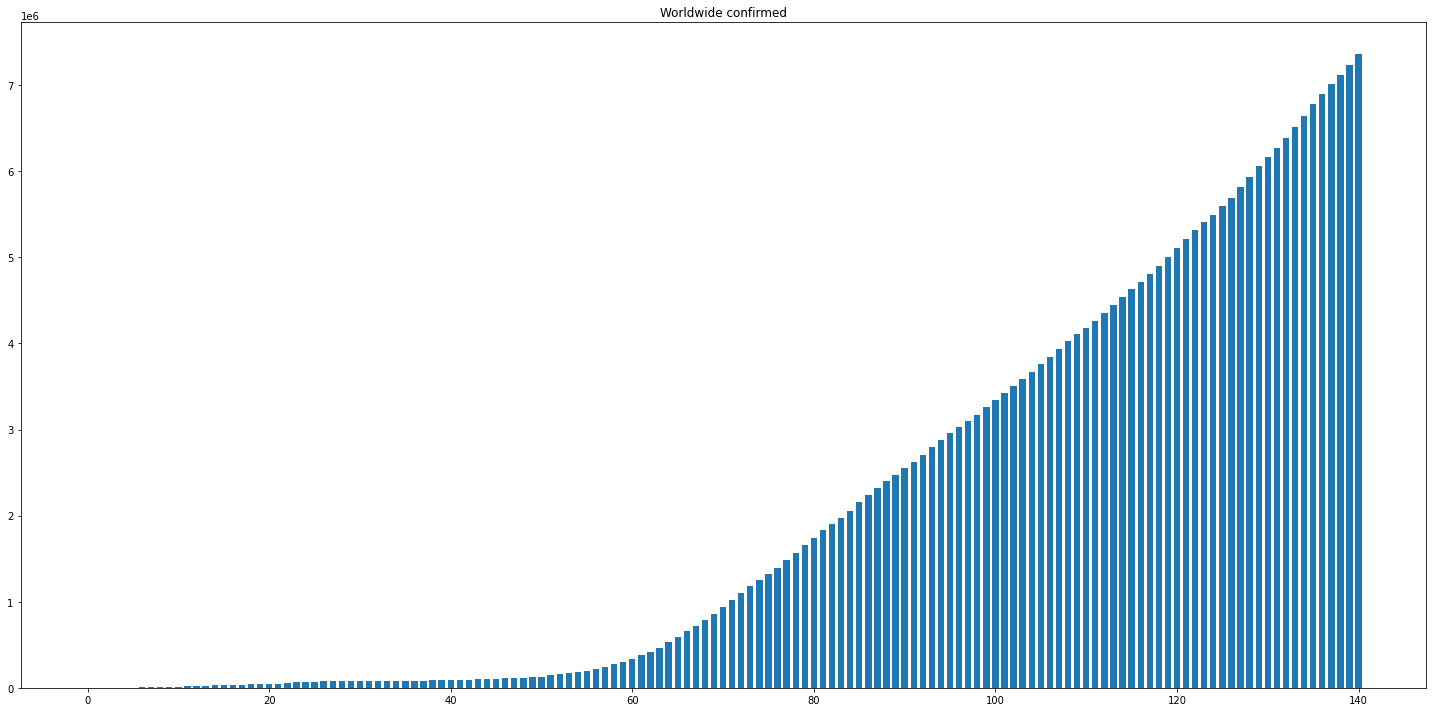

In [14]:
plot_df(data, pcts, dates, title="Worldwide confirmed")

In [15]:
df = woldwild_deaths_df
sum_df = df.sum()

dates = sum_df.index.values[2:]
data = sum_df.values[2:]
pcts = compute_pct(data)

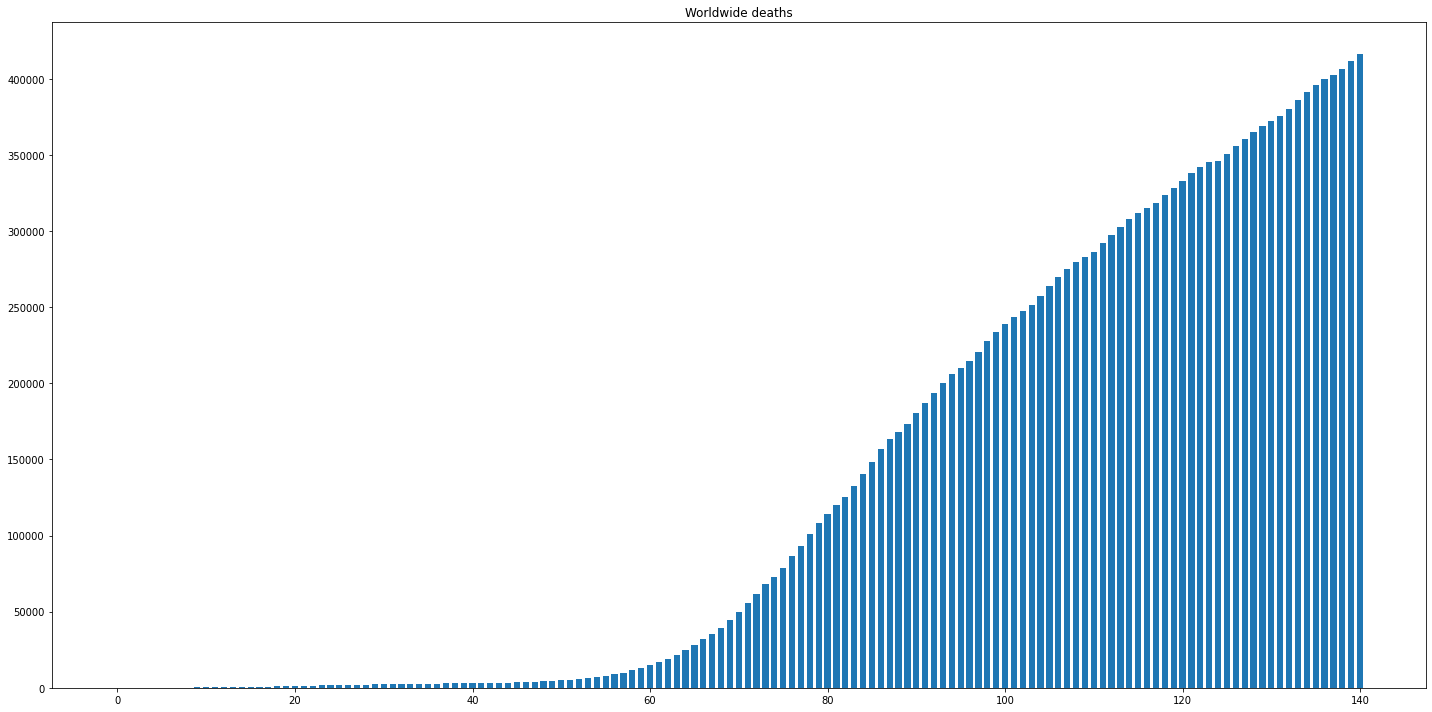

In [16]:
plot_df(data, pcts, dates, title="Worldwide deaths")

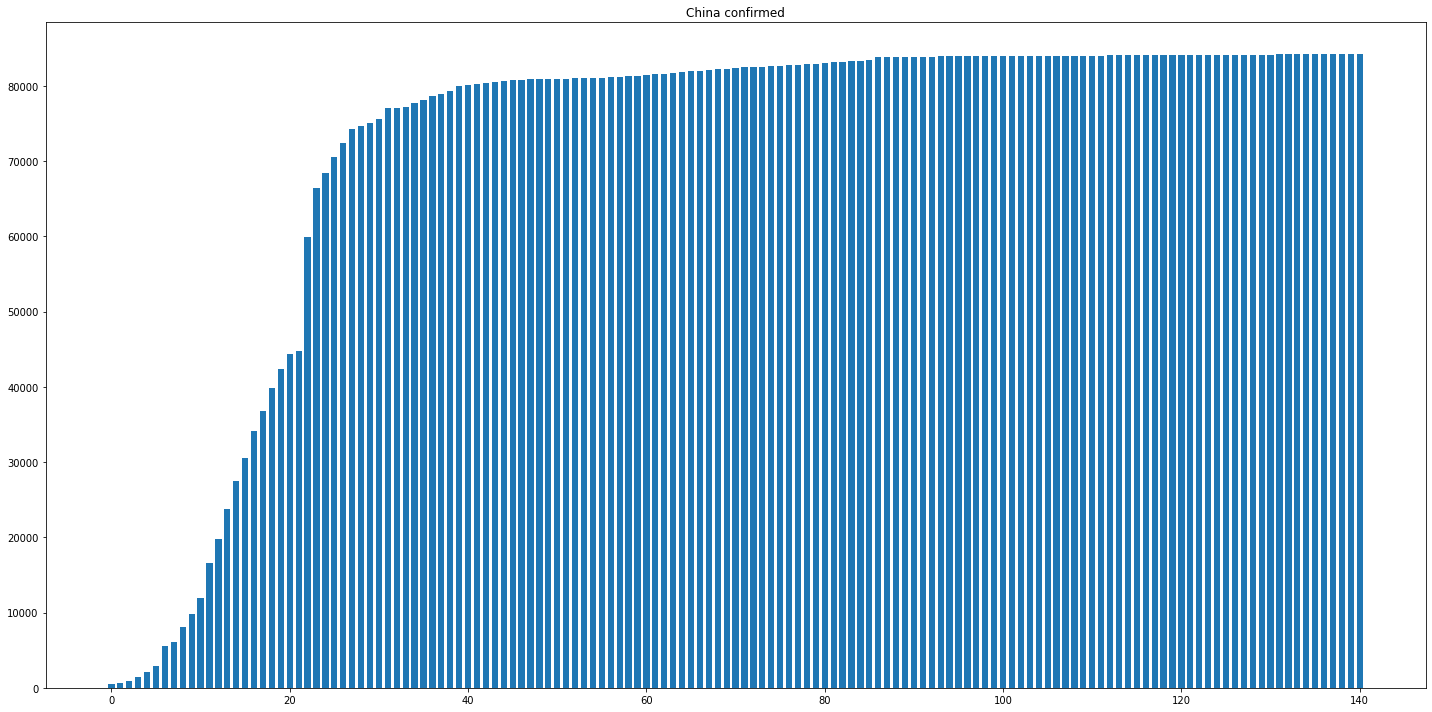

In [17]:
plot_country('China', "confirmed")

In [18]:
country_filter = ['China']

In [19]:
df = woldwild_confirmed_df
filtered_df = df[~df.index.isin(country_filter)]
sum_df = filtered_df.sum()

dates = sum_df.index.values[2:]
data = sum_df.values[2:]
pcts = compute_pct(data)

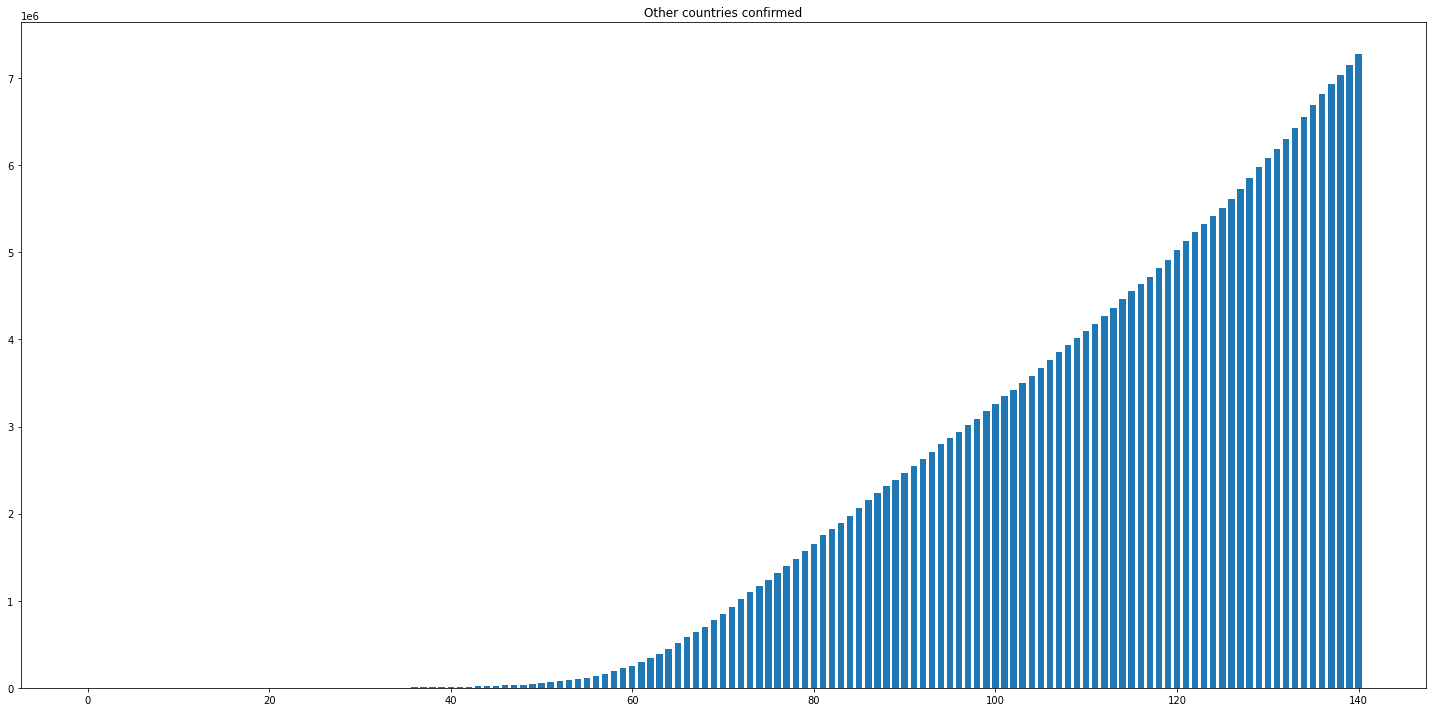

In [20]:
plot_df(data, pcts, dates, title="Other countries confirmed")

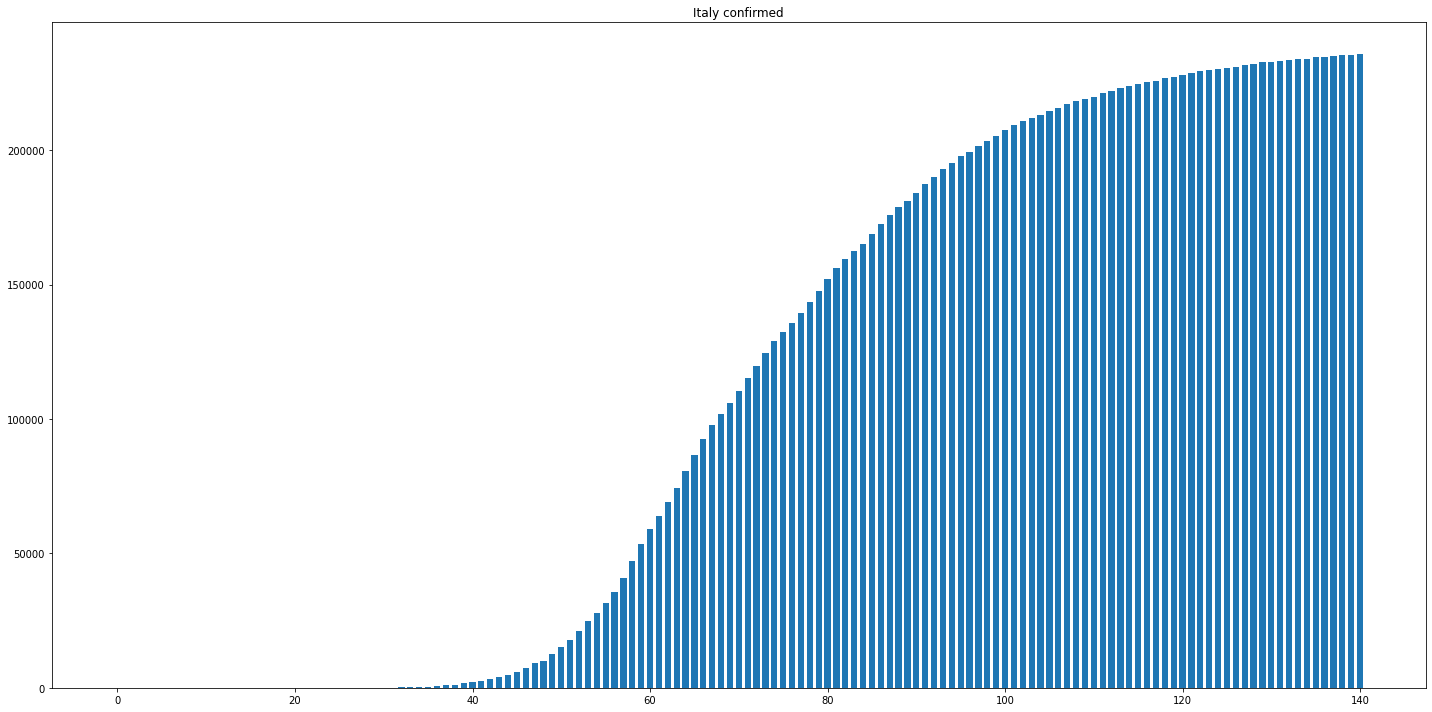

In [21]:
plot_country('Italy', "confirmed")

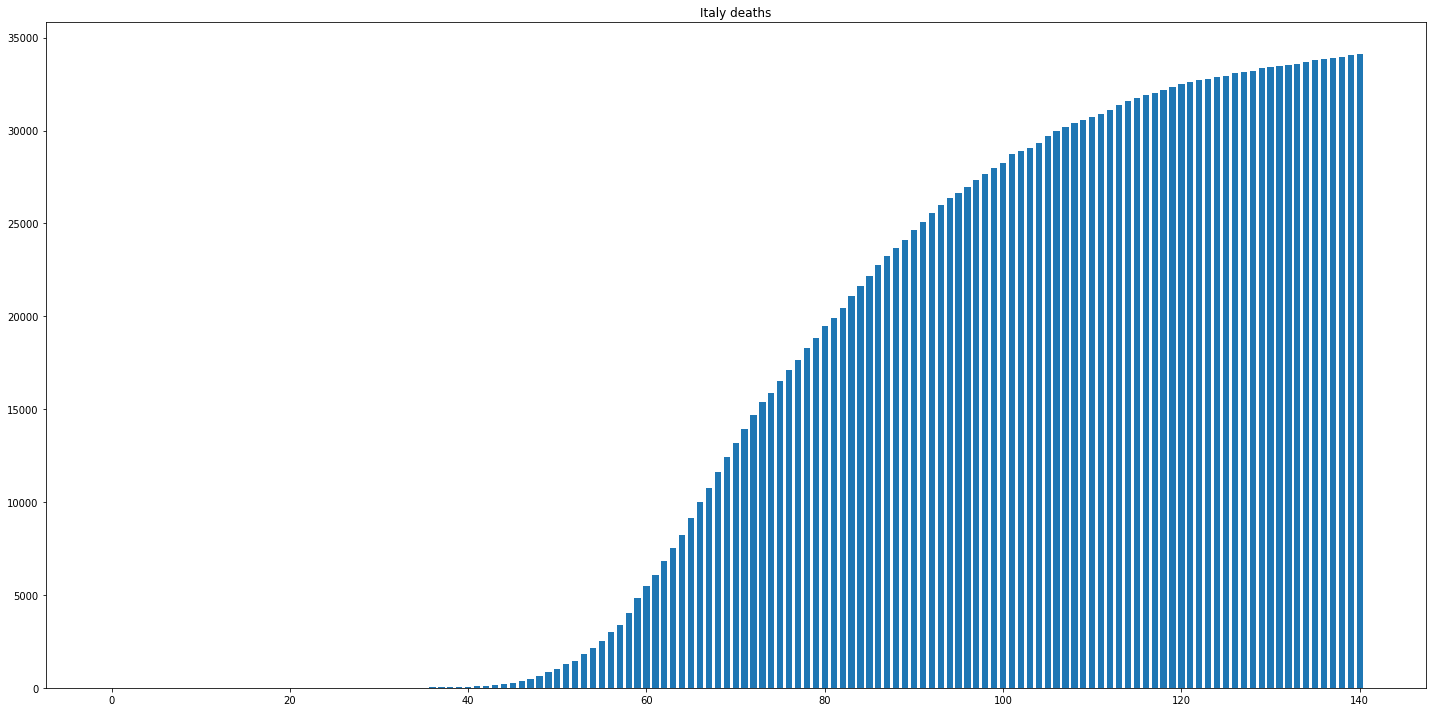

In [22]:
plot_country('Italy', "deaths")

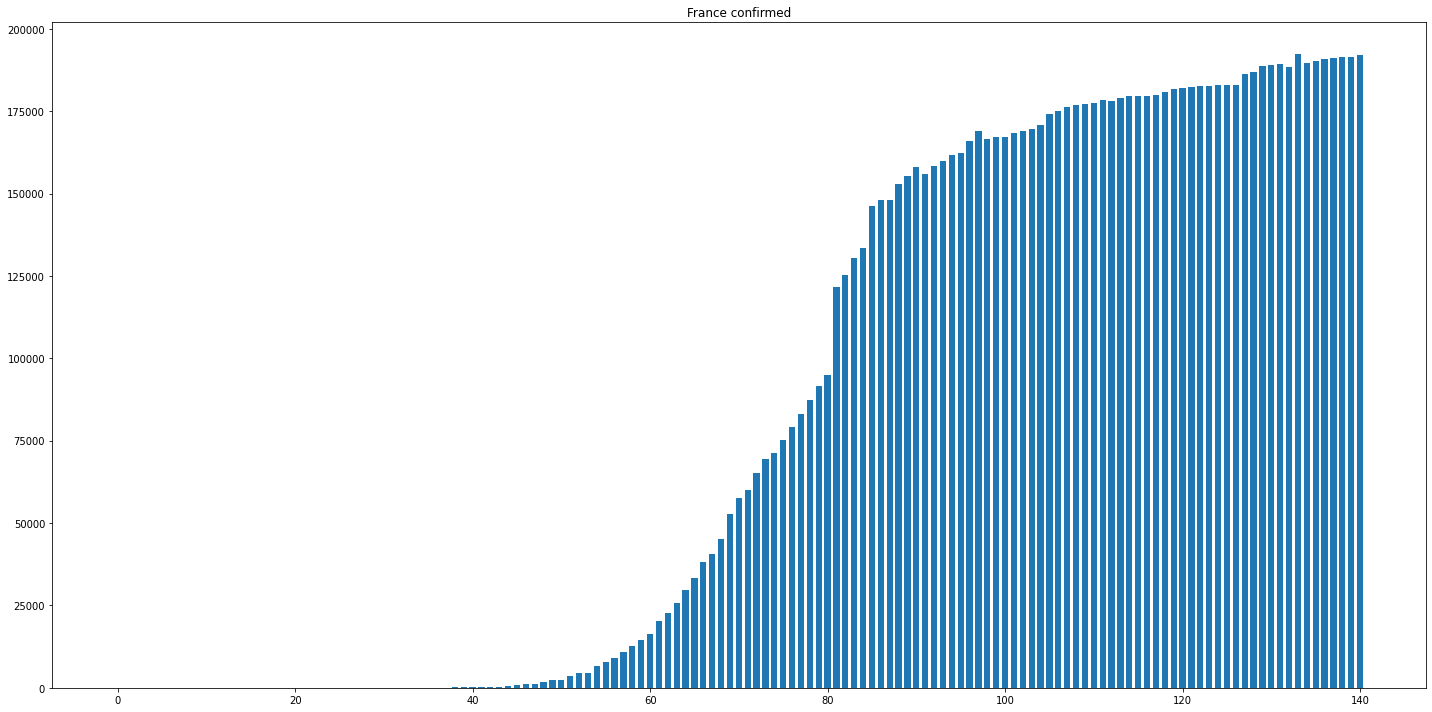

In [23]:
plot_country('France', "confirmed")

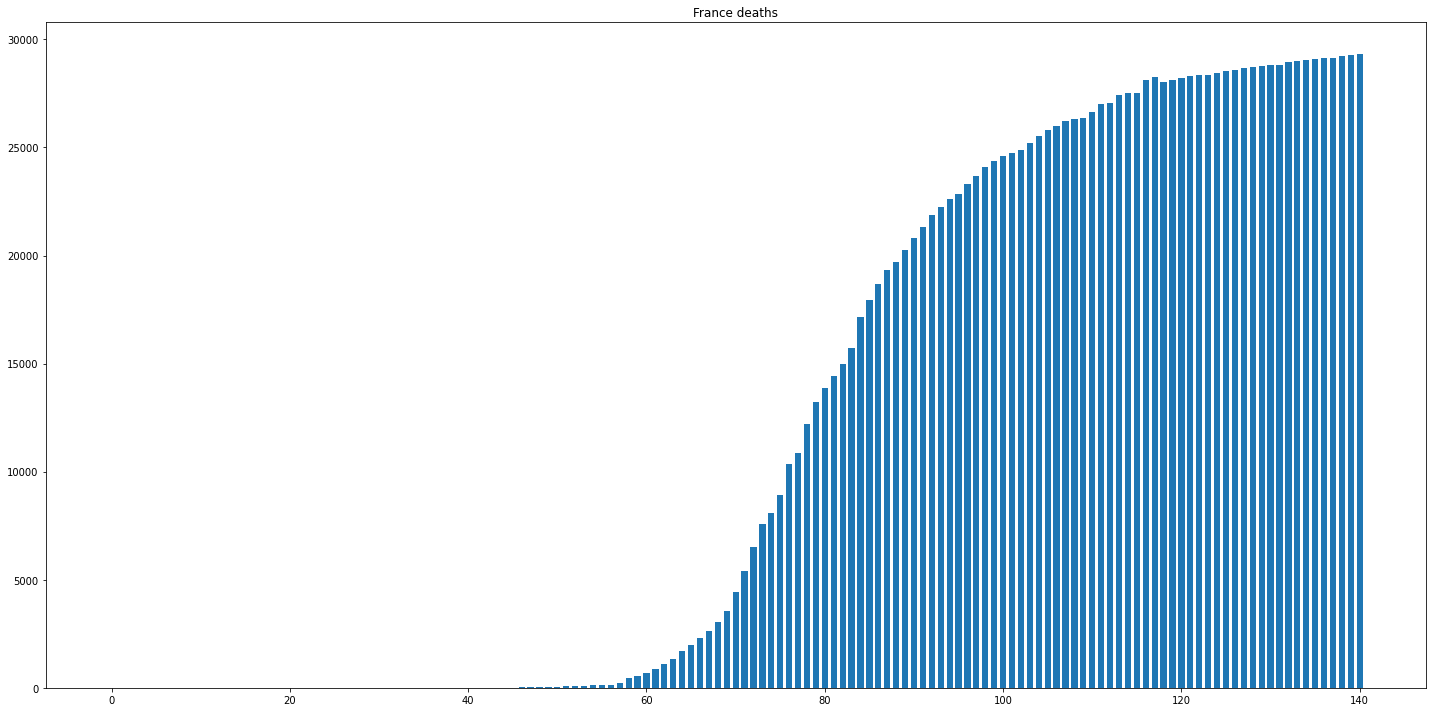

In [24]:
plot_country('France', "deaths")

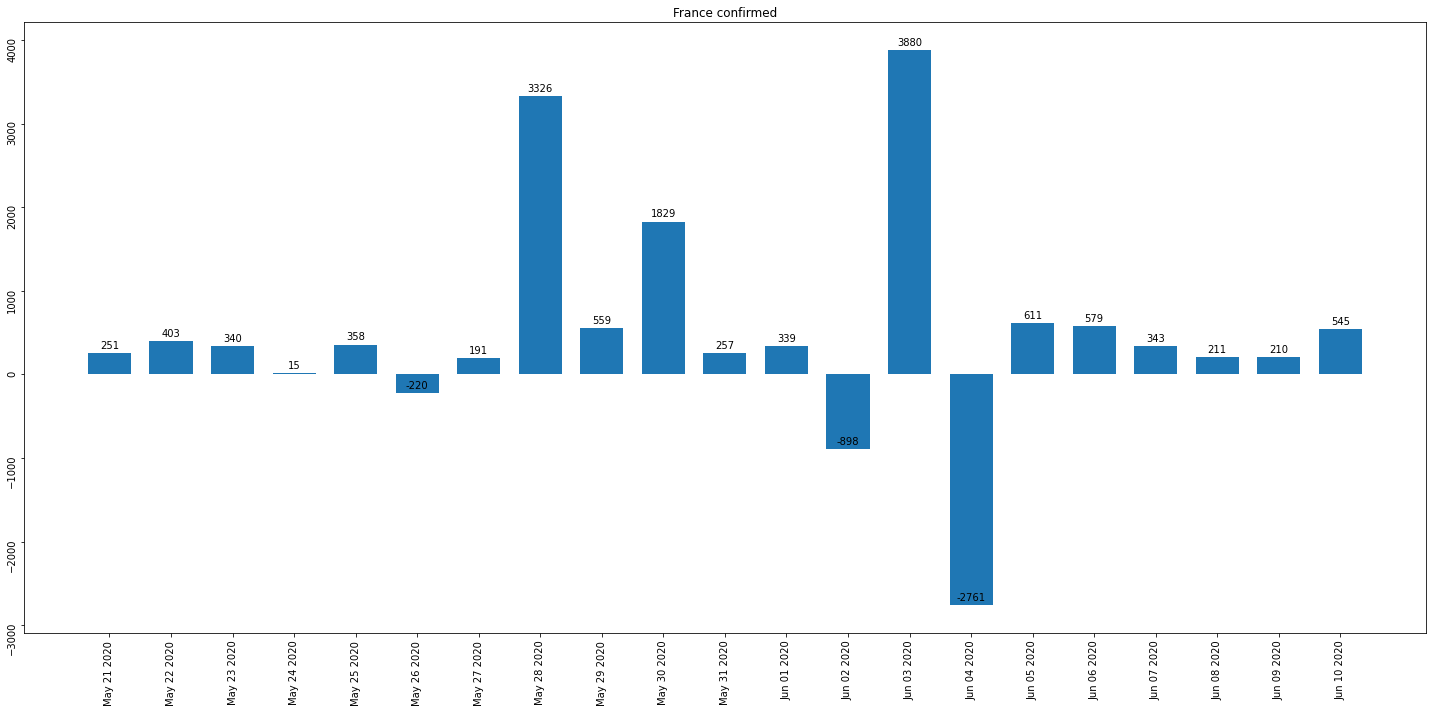

In [40]:
from datetime import date, timedelta

today = date.today()
yesterday = today-timedelta(1)
lastday = today-timedelta(22)
interval = pd.date_range(lastday,yesterday)

plot_country('France', "confirmed", byday=True, dates=interval, display="data")

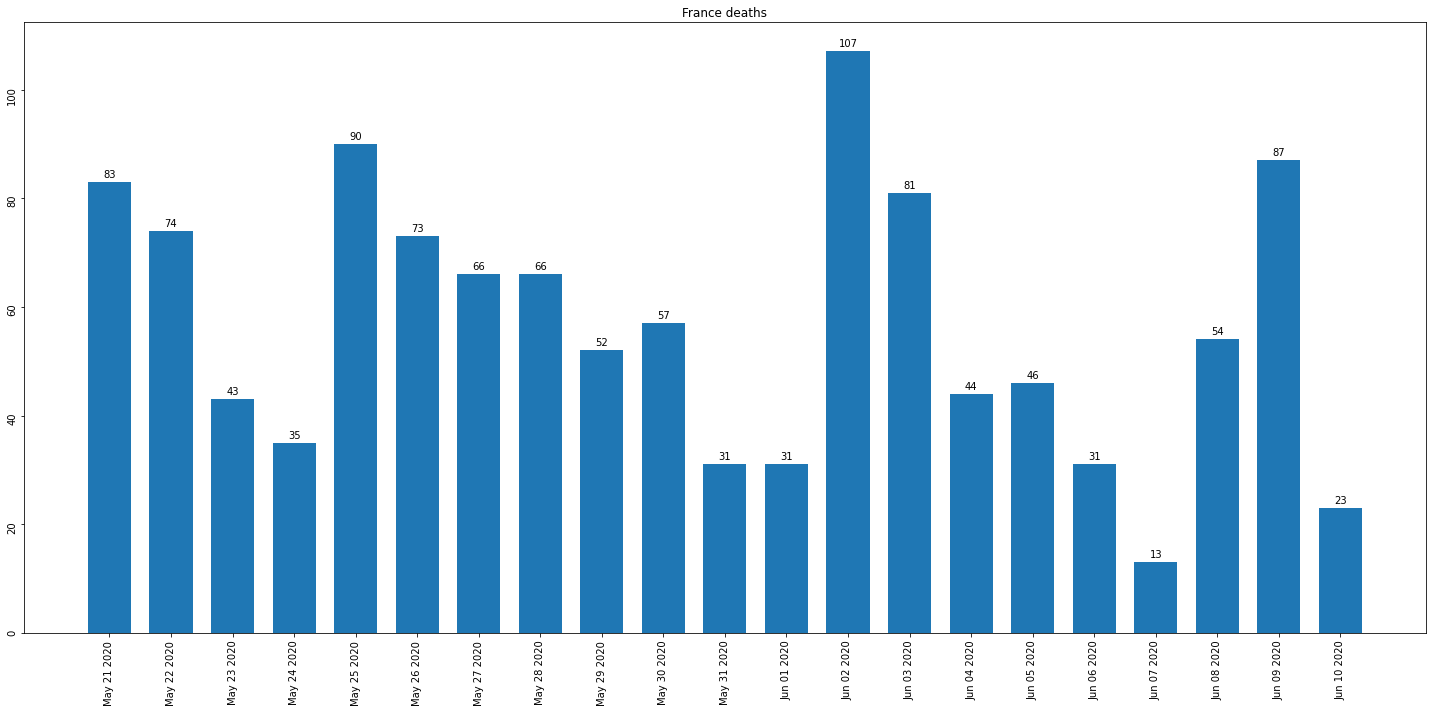

In [39]:
plot_country('France', "deaths", byday=True, dates=interval, display="data")

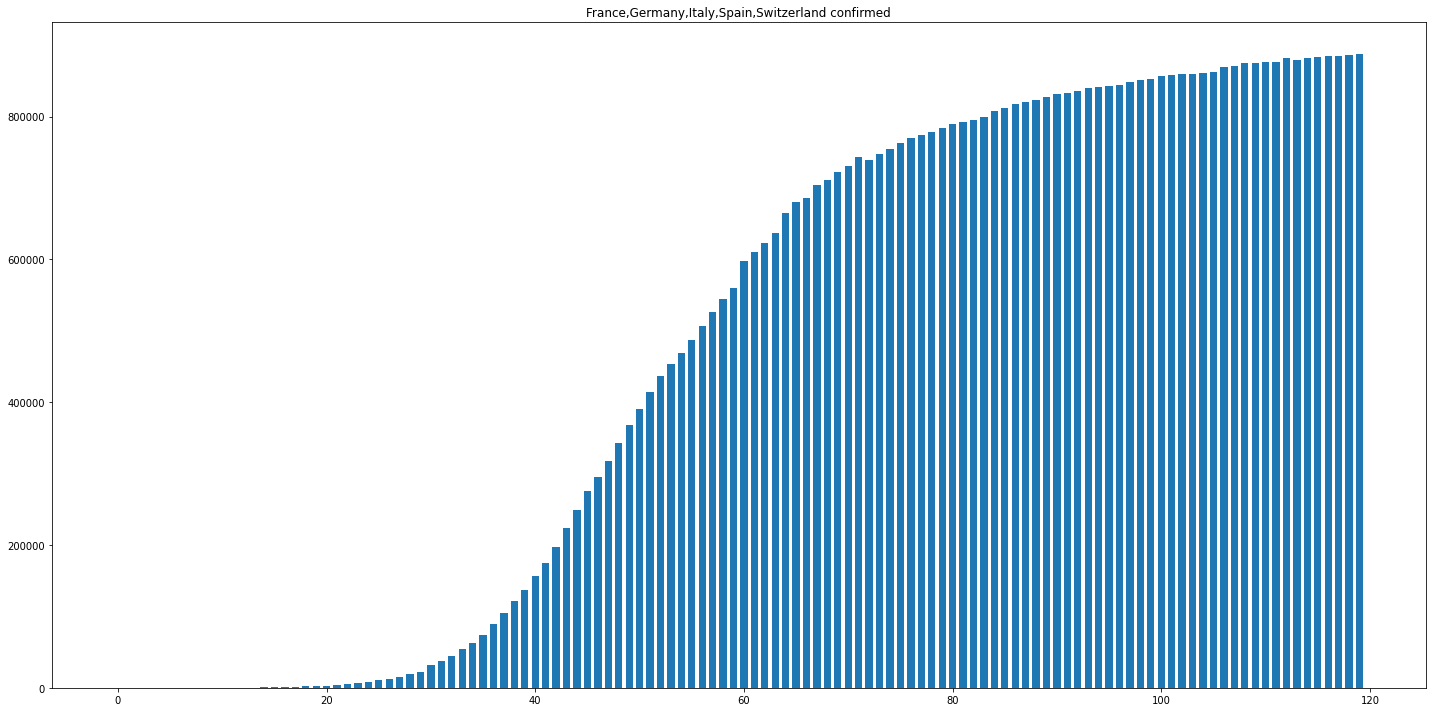

In [47]:
today = date.today()
yesterday = today-timedelta(1)
lastday = today-timedelta(120)
interval = pd.date_range(lastday,yesterday)
plot_region(['France', 'Germany', 'Italy', 'Spain', 'Switzerland'], "confirmed", byday=False, dates=interval, display="None")

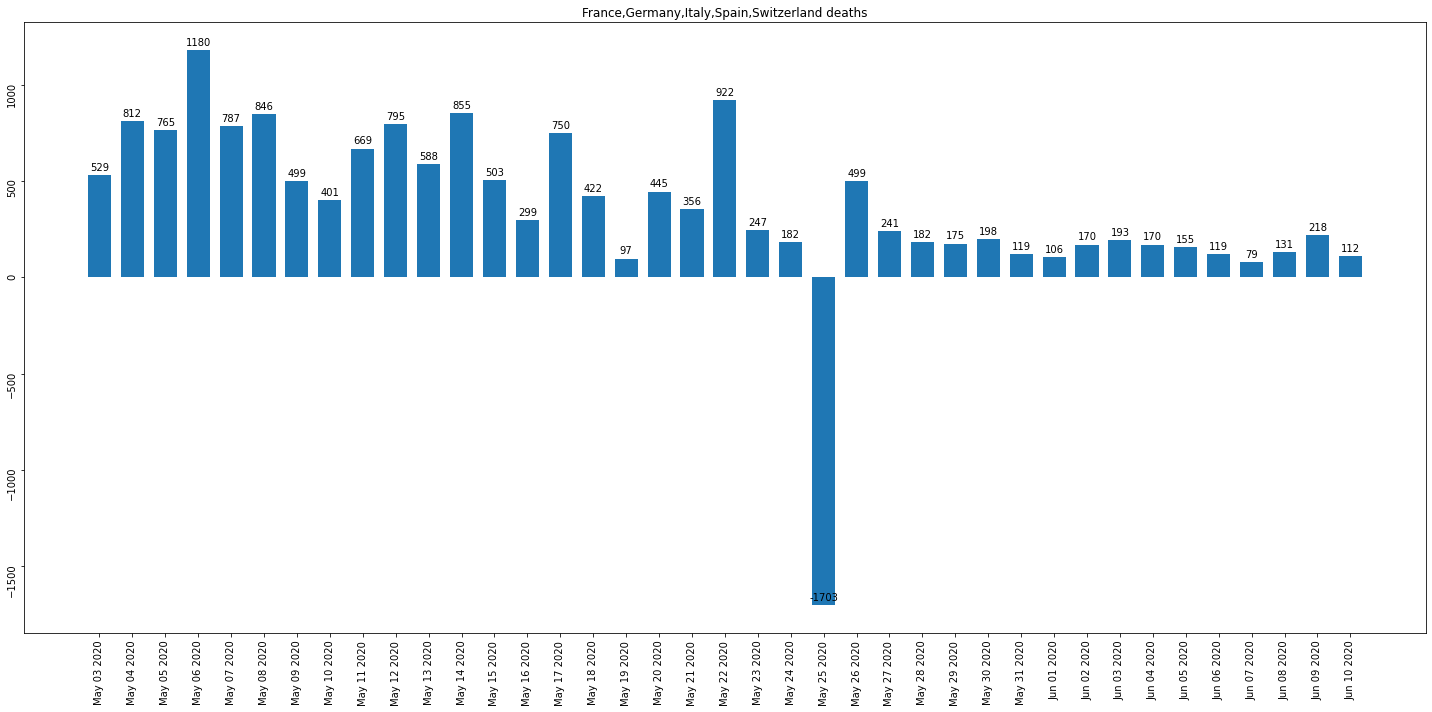

In [45]:
plot_region(['France', 'Germany', 'Italy', 'Spain', 'Switzerland'], "deaths", byday=True, dates=interval, display="data")

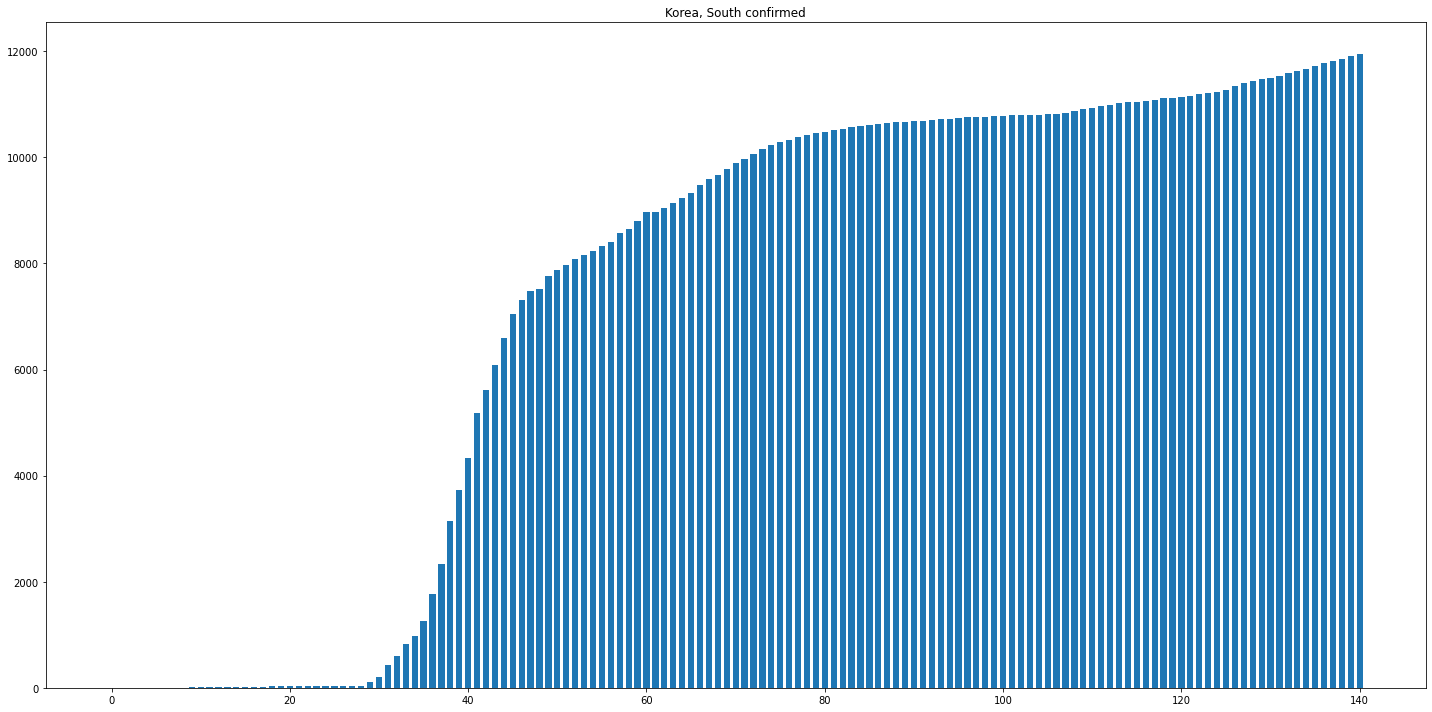

In [26]:
plot_country('Korea, South', "confirmed")

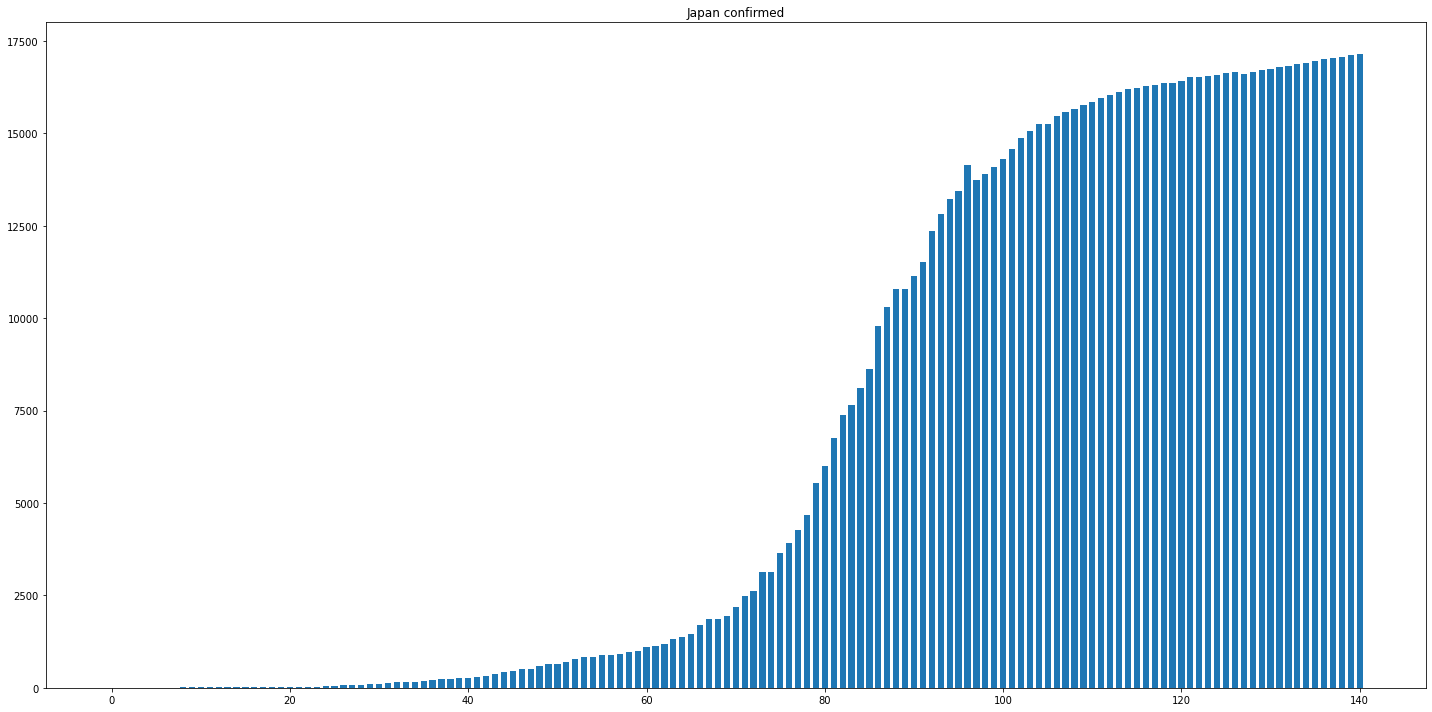

In [27]:
plot_country('Japan', "confirmed")

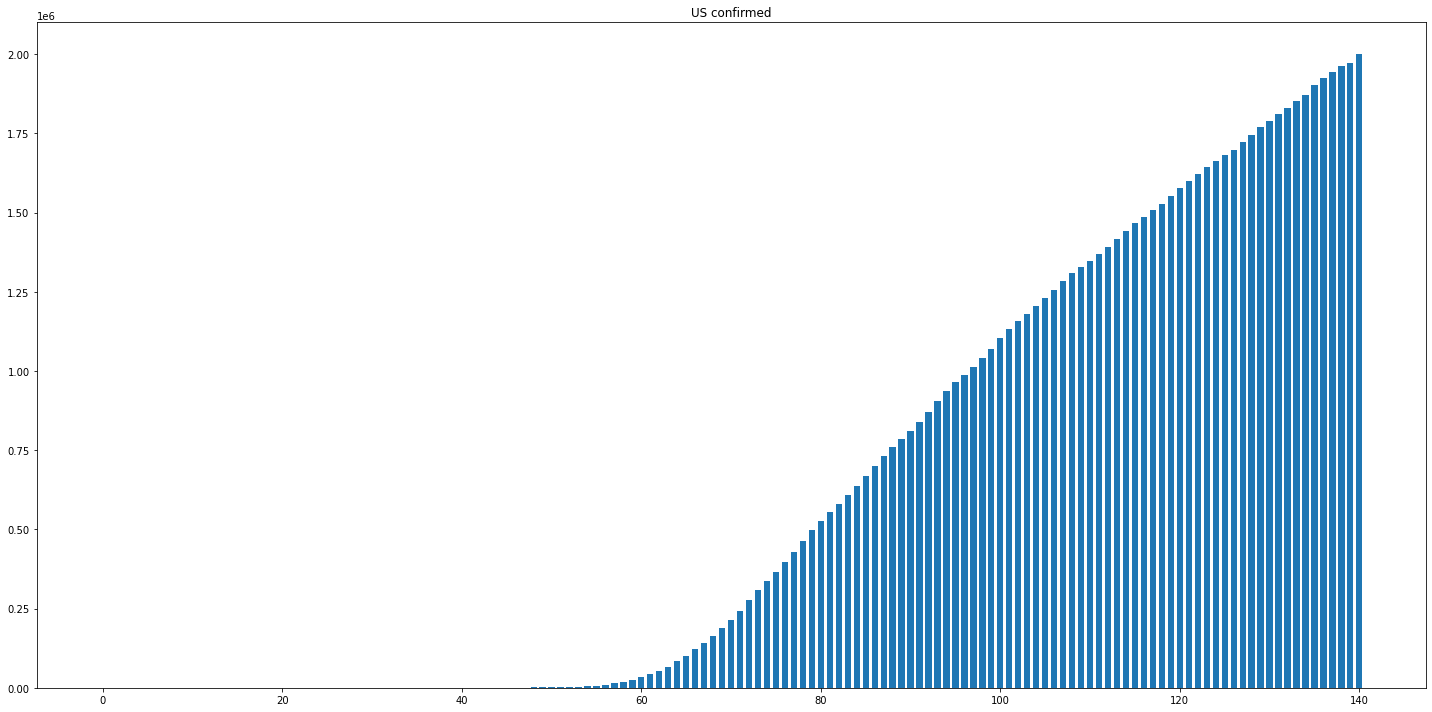

In [28]:
plot_country('US', "confirmed")

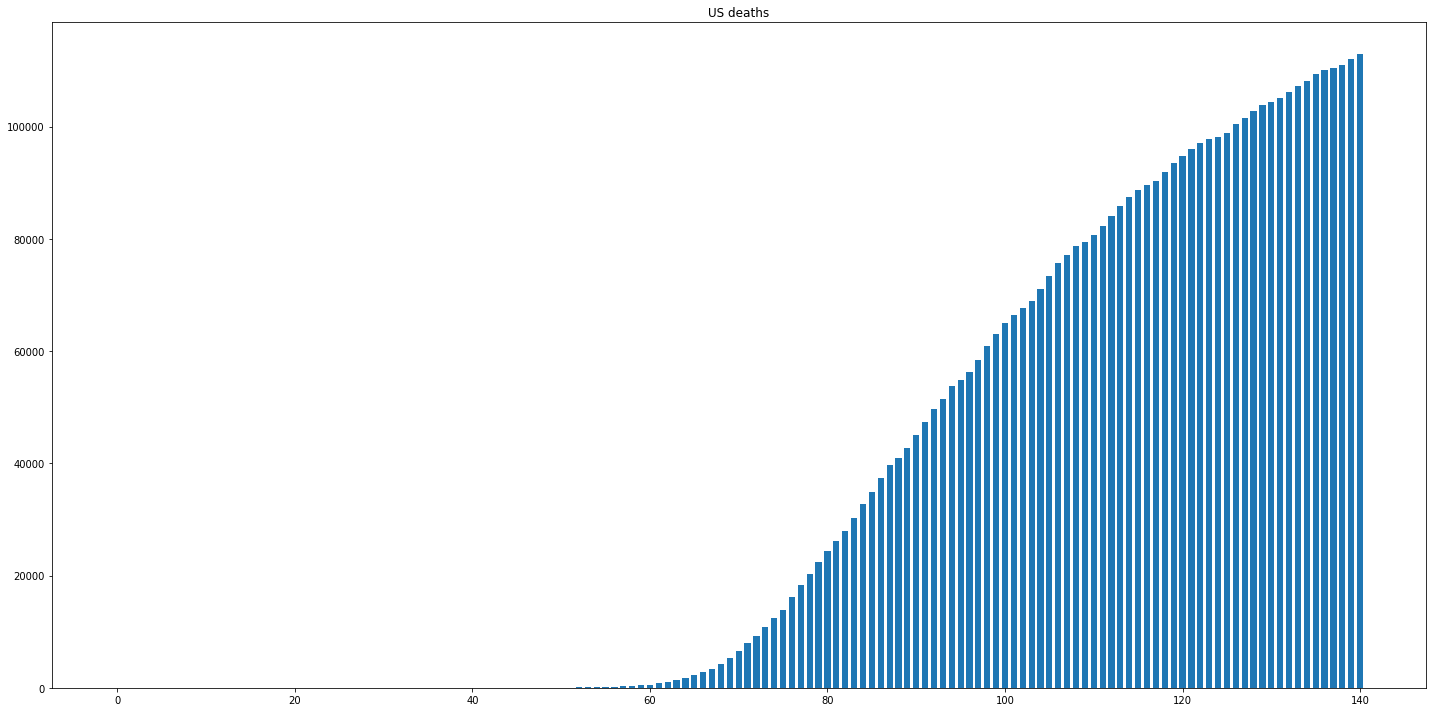

In [29]:
plot_country('US', "deaths")

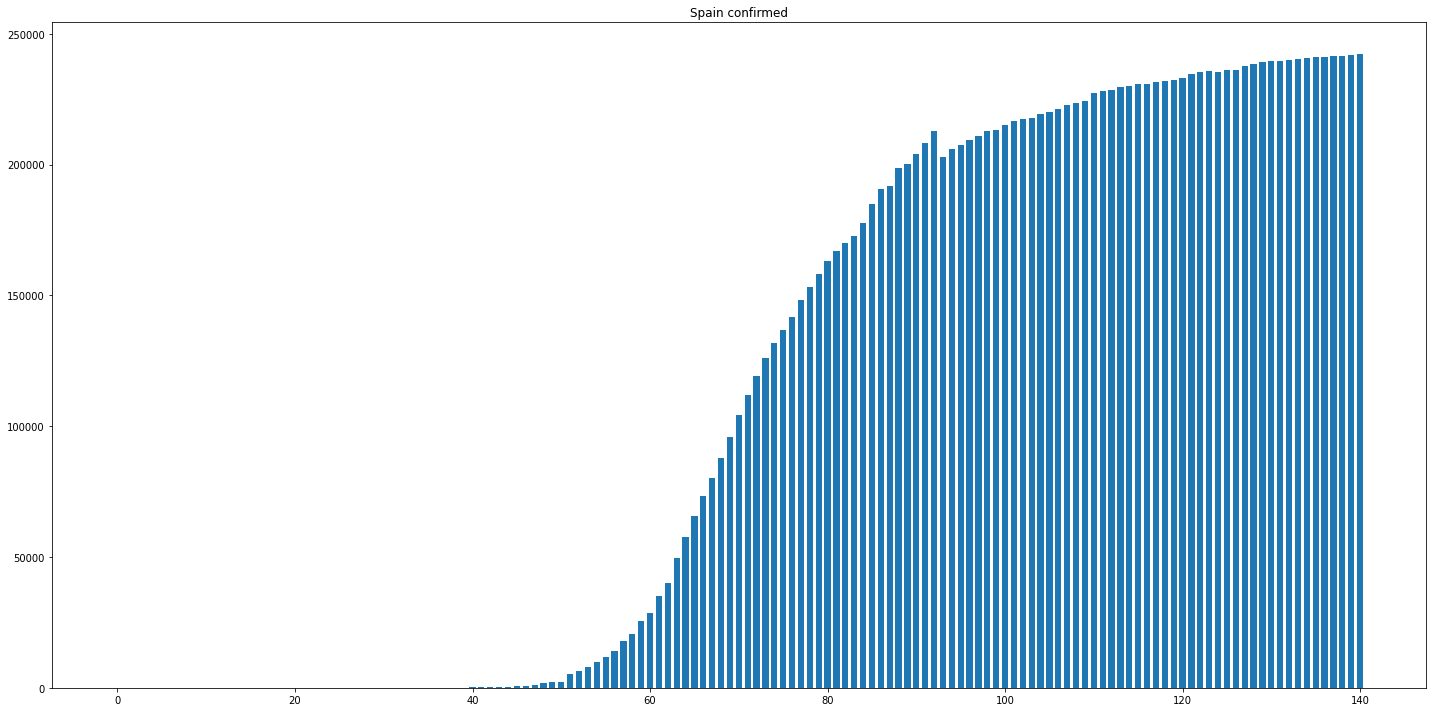

In [30]:
plot_country('Spain', "confirmed")

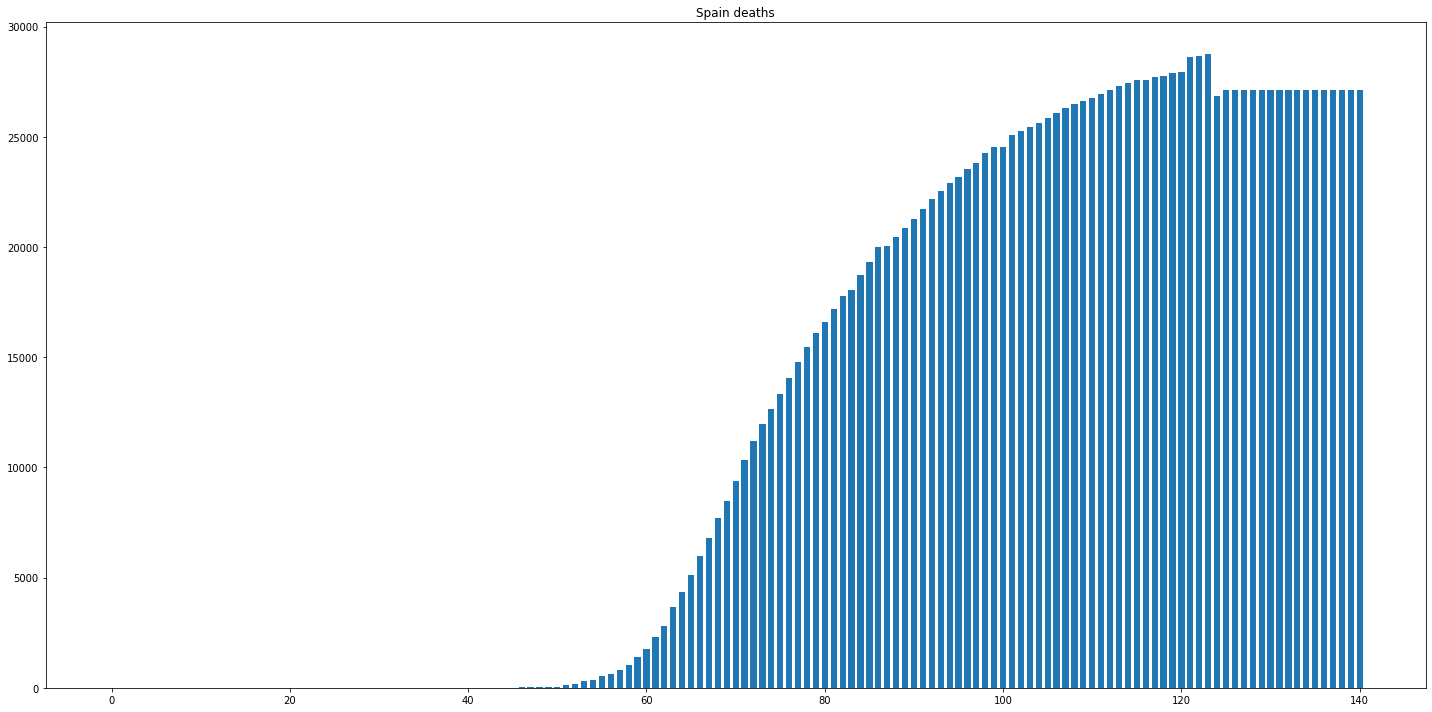

In [31]:
plot_country('Spain', "deaths")

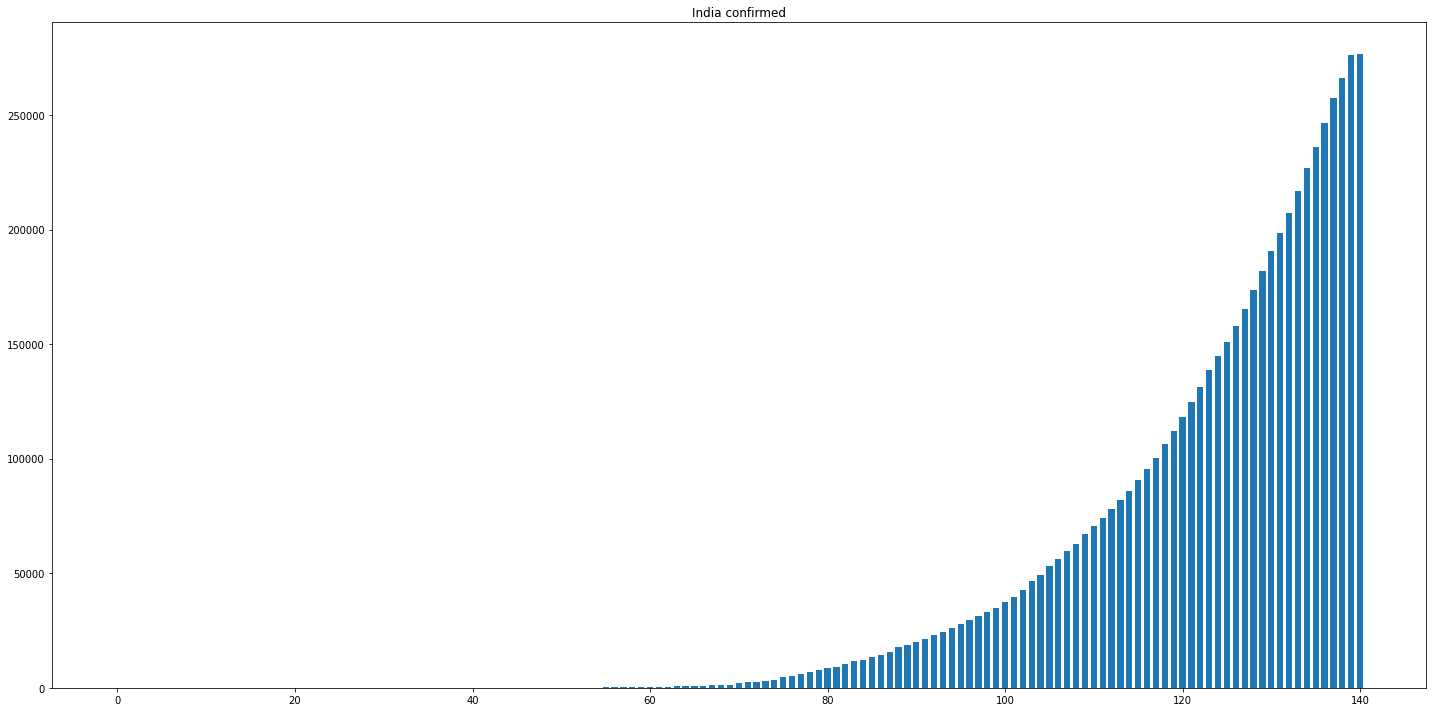

In [32]:
plot_country('India', "confirmed")

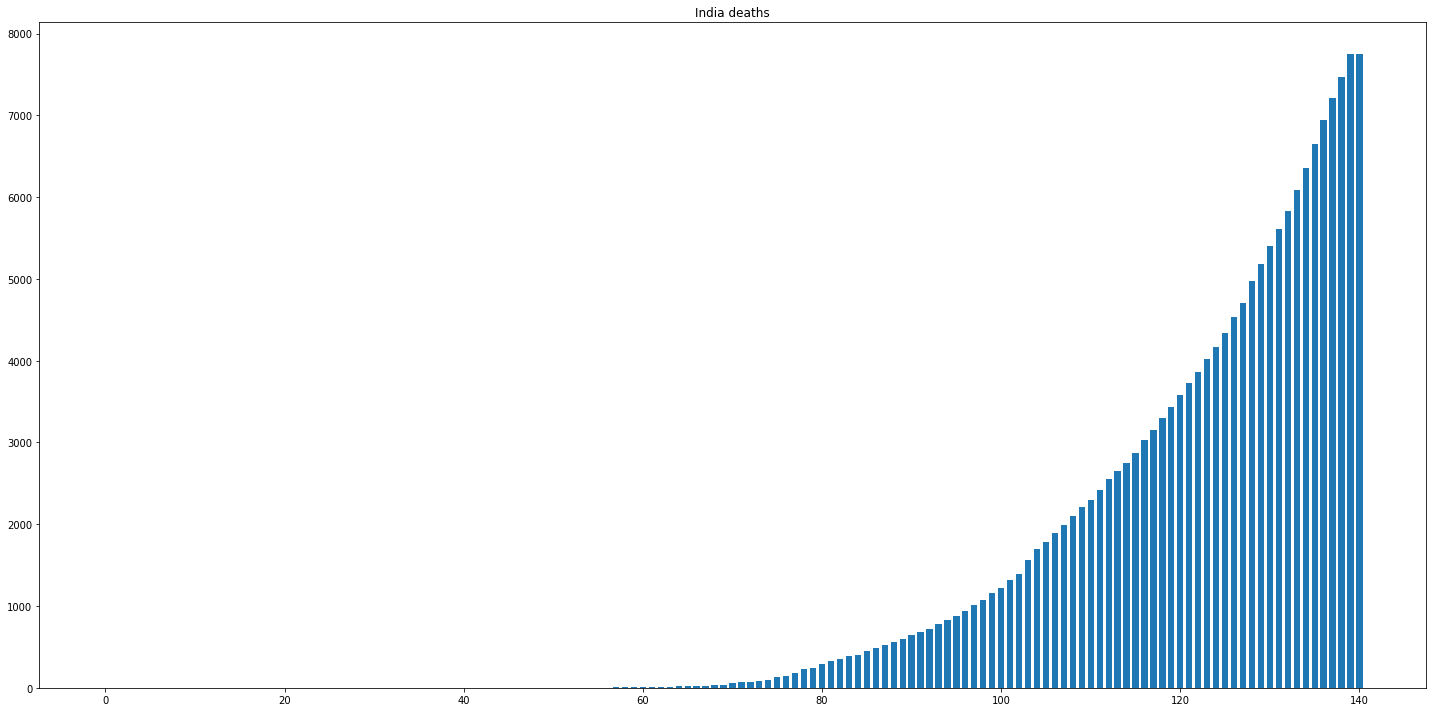

In [33]:
plot_country('India', "deaths")

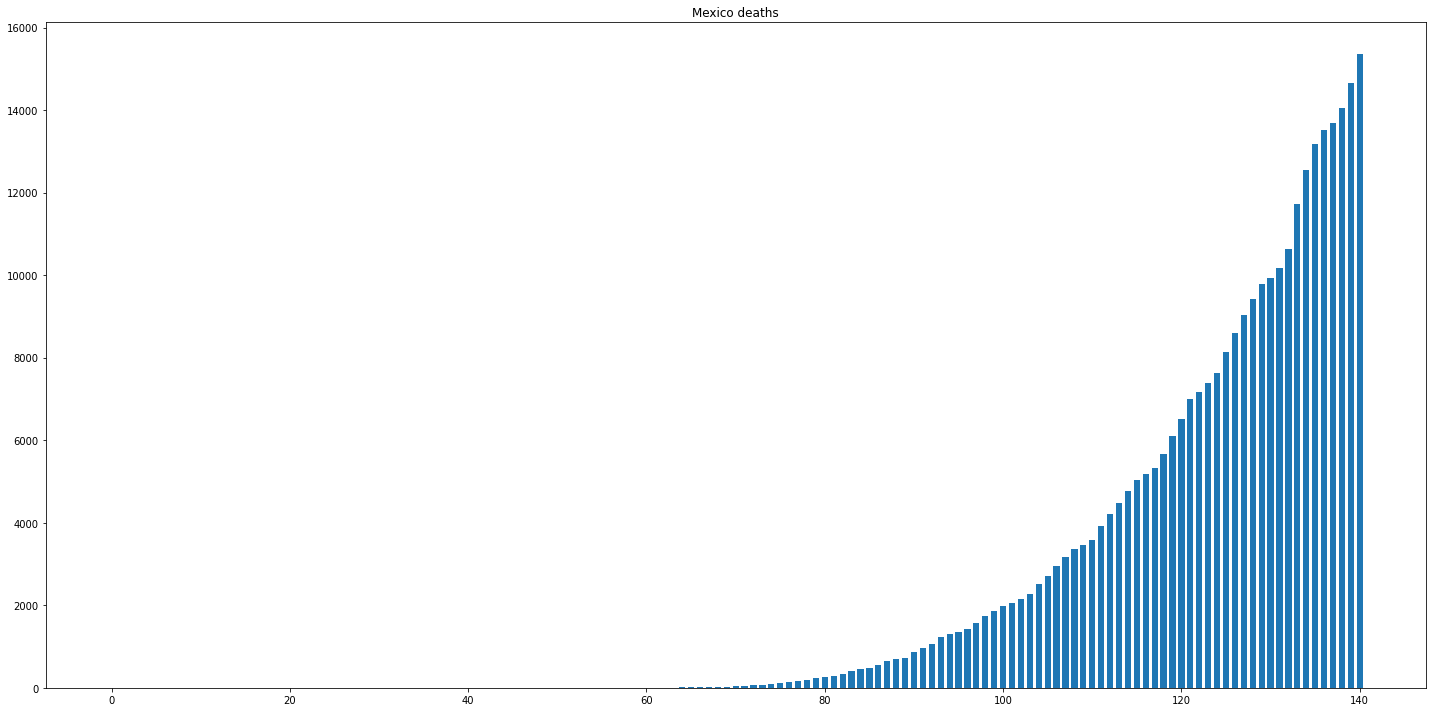

In [49]:
plot_country('Mexico', "deaths")